In [2]:
import pandas as pd
import networkx as nx
from karateclub import DeepWalk, Node2Vec

In [3]:
edges=pd.read_csv("data/clean_edges.csv")
G=nx.from_pandas_edgelist(edges,"source","target")
print("nodes:",G.number_of_nodes(),"edges:",G.number_of_edges())

nodes: 45158 edges: 2107709


In [5]:
G_int=nx.convert_node_labels_to_integers(G,label_attribute="original_id")
print("relabeled nodes:",len(G_int.nodes()))

relabeled nodes: 45158


In [12]:
model_dw=DeepWalk(walk_length=20,dimensions=16,walk_number=5,workers=2)
model_dw.fit(G_int)
emb_dw=model_dw.get_embedding()
print("deepwalk embedding shape:",emb_dw.shape)

deepwalk embedding shape: (45158, 16)


In [13]:
mapping=nx.get_node_attributes(G_int,"original_id")
node_list=[mapping[i] for i in range(len(mapping))]
df_dw=pd.DataFrame(emb_dw,index=node_list)
df_dw.reset_index(inplace=True)
df_dw.columns=["node"]+[f"dw_{i}" for i in range(emb_dw.shape[1])]
df_dw.to_csv("data/deepwalk_embeddings.csv",index=False)
print("saved dw embeddings")

saved dw embeddings


In [7]:
# model_n2v=Node2Vec(walk_length=10,dimensions=16,walk_number=3,workers=4)
# model_n2v.fit(G_int)
# emb_n2v=model_n2v.get_embedding()
# print("node2vec embedding shape:",emb_n2v.shape)

In [8]:
# mapping=nx.get_node_attributes(G_int,"original_id")
# node_list=[mapping[i] for i in range(len(mapping))]
# df_n2v=pd.DataFrame(emb_n2v,index=node_list)
# df_n2v.reset_index(inplace=True)
# df_n2v.columns=["node"]+[f"n2v_{i}" for i in range(emb_n2v.shape[1])]
# df_n2v.to_csv("data/node2vec_embeddings.csv",index=False)
# print("saved n2v embeddings.")

In [9]:
import pandas as pd

In [10]:
dw=pd.read_csv("data/deepwalk_embeddings.csv")

In [11]:
dw.shape

(45158, 17)

In [12]:
dw.head(10)

,node,dw_0,dw_1,dw_2,dw_3,dw_4,dw_5,dw_6,dw_7,dw_8,dw_9,dw_10,dw_11,dw_12,dw_13,dw_14,dw_15
0,Gene::9021,1.010406,-0.633606,-0.945365,-1.788558,0.681705,-0.790902,-0.932411,0.588293,0.681000,0.878555,0.781311,-2.107450,-0.102509,0.310479,1.123205,-0.914021
1,Biological Process::GO:0071357,0.314515,-0.619835,0.202270,0.151577,1.007136,-0.475345,-0.905389,0.509484,0.267854,0.285403,0.728416,-1.162914,0.016440,0.549378,0.173692,-0.201169
2,Gene::51676,0.294189,-0.202508,-0.253945,-0.119668,0.955101,-1.007778,-0.277840,0.744806,0.997981,0.902201,1.845594,-0.179609,-0.822157,0.254725,0.830060,-0.220943
3,Biological Process::GO:0098780,-0.138189,-0.226794,0.228115,-0.067264,1.521147,-0.370653,-1.084367,-0.468562,-0.336232,-1.179568,0.491197,0.484488,-0.391808,-0.574717,-0.763894,-0.497863
4,Gene::19,-0.349271,-0.330626,-0.142406,-1.636602,0.688358,1.323018,-1.078778,-0.945183,1.002238,-0.770264,1.074546,-0.717893,-1.032164,0.457759,1.111838,-0.262225
5,Biological Process::GO:0055088,0.607313,-0.284335,0.168239,-0.188588,0.950881,0.408680,-1.092946,-0.192520,-0.320178,-1.147211,0.334155,-1.018211,0.109955,0.400554,-0.293802,-0.306349
6,Gene::3176,-0.644686,-0.238703,-0.082740,-0.651690,0.808032,0.257805,0.076811,0.098066,0.207837,0.448407,1.776610,-0.284991,-0.684476,0.494787,1.530203,-0.373799
7,Biological Process::GO:0010243,0.773962,-2.429352,-0.637188,-2.275701,0.371259,-1.464309,-1.176716,-1.517807,-0.574939,0.155003,0.383080,-0.979516,-0.306847,1.831175,-0.795148,-0.343979
8,Gene::3039,-0.150796,-0.552544,-0.331772,-0.693330,1.428888,0.529687,-0.366500,-0.219417,0.114010,-0.209738,1.608618,0.294557,-0.559935,-0.363681,0.501126,-0.469732
9,Biological Process::GO:0006898,-0.159779,-0.860640,0.159012,-1.655798,0.799822,-0.749363,-1.088607,-0.575971,-0.389917,-1.398393,0.449043,0.131312,0.450550,0.248521,0.092896,0.364347


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [14]:
X=dw.drop(columns=["node"])
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X)

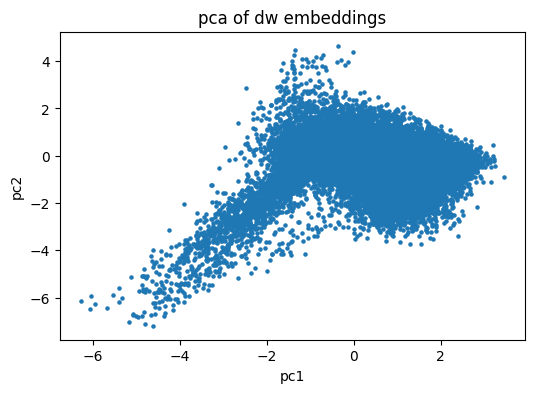

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(pca_result[:,0],pca_result[:,1],s=5)
plt.title("pca of dw embeddings")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne=TSNE(n_components=2,perplexity=30,random_state=42)
tsne_result=tsne.fit_transform(X)

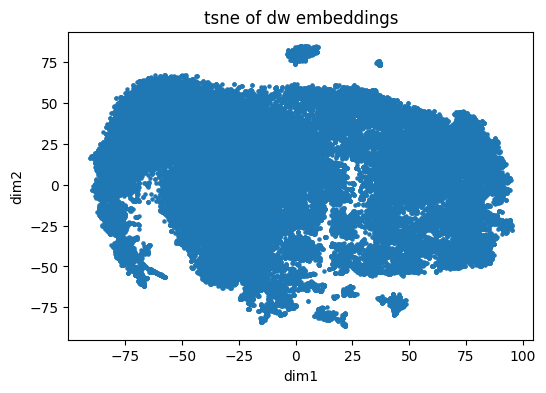

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(tsne_result[:,0],tsne_result[:,1],s=5)
plt.title("tsne of dw embeddings")
plt.xlabel("dim1")
plt.ylabel("dim2")
plt.show()

In [19]:
import networkx as nx
import random
import numpy as np

In [20]:
edges=pd.read_csv("data/clean_edges.csv")
G=nx.from_pandas_edgelist(edges,"source","target")

In [23]:
edges_pos=list(G.edges())
edges_pos=random.sample(edges_pos,20000)
edges_neg=[]
while len(edges_neg)<len(edges_pos):
    a,b=random.sample(list(G.nodes()),2)
    if not G.has_edge(a,b):
        edges_neg.append((a,b))

In [24]:
edges_all=edges_pos+edges_neg
labels=[1]*len(edges_pos)+[0]*len(edges_neg)

In [25]:
emb_dict=dict(zip(dw["node"],dw.drop(columns=["node"]).values))
def edge_feature(a,b):
    if a in emb_dict and b in emb_dict:
        return emb_dict[a]*emb_dict[b]
    else:
        return np.zeros(X.shape[1])
X_edges=np.array([edge_feature(a,b) for a,b in edges_all])
y=np.array(labels)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X_edges,y,test_size=0.2,random_state=42)
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
y_prob=clf.predict_proba(X_test)[:,1]

In [28]:
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [29]:
acc=accuracy_score(y_test,y_pred)
auc=roc_auc_score(y_test,y_prob)
f1=f1_score(y_test,y_pred)

In [30]:
print("Accuracy:",round(acc,3))
print("ROC AUC:",round(auc,3))
print("F1 Score:",round(f1,3))

Accuracy: 0.832
ROC AUC: 0.903
F1 Score: 0.822


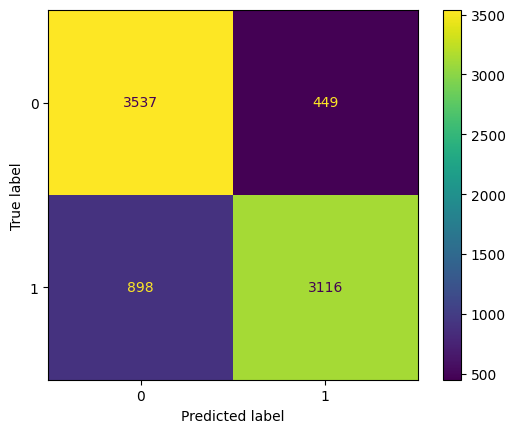

In [31]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
plt.show()

for eg. visualizing a single predn

In [32]:
import random

In [33]:
idx=random.randint(0,len(X_test)-1)
a,b=edges_all[len(edges_all)-len(y_test)+idx]
pred_prob=y_prob[idx]
pred_label=y_pred[idx]

In [34]:
print("src node:",a)
print("target node:",b)
print("predicted probability of edge:",round(pred_prob,3))
print("predicted label (1=edge,0=no edge):",pred_label)

src node: Biological Process::GO:0002449
target node: Molecular Function::GO:0004993
predicted probability of edge: 0.214
predicted label (1=edge,0=no edge): 0
